In [199]:
#from google.colab import drive
#drive.mount('/content/drive')

In [200]:
import os
import json
import re
import pandas as pd

# Annotations and Metadata
def load_json_files(folder_path):
    data = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.json'):
            with open(os.path.join(folder_path, file_name), 'r') as f:
                data.append(json.load(f))
    return data

# Folders
annotations_folder = r"B:\annotations\sample\coco\annotations"
metadata_folder = r"B:\annotations\sample\ocular-json"

# Load all annotations and metadata
annotations = load_json_files(annotations_folder)
metadata = load_json_files(metadata_folder)

In [201]:
# Extract timestamp from file name or file path
def extract_timestamp(file_path):
    match = re.search(r'Ocular_(\d{4}-\d{2}-\d{2}_\d{2}_\d{2}_\d{2})', file_path)
    return match.group(1) if match else None

In [279]:
metadata_list = []
for meta in metadata:
    if isinstance(meta, dict):
        # Processing each key-value pair in the dictionary
        timestamp = extract_timestamp(meta.get('file_path', None))
        if timestamp:
            metadata_list.append({
                'image_id' : image_id,
                'timestamp': timestamp,
                'zoom_ration': meta.get('zoom_ration', None),
                'slide_name': meta.get('slide_name', None),
                'username': meta.get('username', None),
                'stain': meta.get('stain', None),
            })
        else:
            print('No timestamp found')

metadata_df = pd.DataFrame(metadata_list)

In [232]:
import pandas as pd

# Based on the timestamp pattern in the file paths match annotations to metadata
annotation_list = []
for annotation_file in annotations:
    for image in annotation_file['images']:
        file_name = image['file_name']
        image_id = image['id']
        timestamp = extract_timestamp(file_name)
        if timestamp:
            matching_metadata = metadata_df[metadata_df['timestamp'] == timestamp]
            if not matching_metadata.empty:
                for annotation in annotation_file['annotations']:
                    if annotation['image_id'] == image['id']:
                        for category in annotation_file['categories']:
                            category_name = category['name']
                            category_id = category['id']
                            if annotation['category_id'] == category_id:
                             for _, row in matching_metadata.iterrows():
                                annotation_list.append({
                                'file_name': file_name,
                                'category_id': annotation['category_id'],
                                'category_name':category_name,
                                'image_id': image_id,
                                'zoom_ration': row['zoom_ration']
                                })


sample_annotations_df = pd.DataFrame(annotation_list)

In [233]:
#sample_annotations_df.to_csv('annotations_df.csv', sep=',', header=True, index=False, na_rep='NA', float_format='%.2f')

In [207]:
grouped_2 = metadata_df.groupby(['slide_name','zoom_ration']).size().reset_index(name='count')
grouped_2.columns = ['slide_name','zoom_ration','Number']
#print(grouped_2)
slides = pd.DataFrame(grouped_2)
slides.head()

,slide_name,zoom_ration,Number
0,1,1.6,1
1,126_f_eu,1.0,20
2,1487,1.0,1
3,2,1.2,1
4,DSI AYE 013-G-NU,2.8,1


In [208]:
grouped_annotations = sample_annotations_df.groupby(['image_id','zoom_ration','category_name']).size().reset_index(name='number')
#print(grouped_annotations)
slides_2 = pd.DataFrame(grouped_annotations)
slides_2.head()

,image_id,zoom_ration,category_name,number
0,1,1.0,PF,9
1,1,1.0,Trophozoite,1
2,1,1.2,Trophozoite,90
3,1,1.2,WBC,15
4,1,1.6,Trophozoite,27


In [230]:
grouped_annotations = sample_annotations_df.groupby(['image_id','zoom_ration','category_name']).size().reset_index(name='number')
#print(grouped_annotations)
slides_2 = pd.DataFrame(grouped_annotations)
#slides_2.head(26)
slides_number = slides_2['image_id'].value_counts()
slides_number.head()

image_id
12     8
31     8
102    8
26     8
91     8
Name: count, dtype: int64

In [278]:
grouped_meta = metadata_df.groupby(['zoom_ration','slide_name']).size().reset_index(name='number')
#print(grouped_annotations)
slides_3 = pd.DataFrame(grouped_meta)
#slides_2.head(26)
slides_number_3 = slides_3['slide_name'].value_counts()
slides_number_3.head()

slide_name
Thin_Slide_ARR_04    15
Thin-16-ARRH         11
Thick-15-ARRH        11
Thin_Slide_ARR_01    11
Thin-14-ARRH         11
Name: count, dtype: int64

In [275]:
# Number of images
category_counts = slides_2['image_id'].value_counts()
category_counts

image_id
12     8
31     8
102    8
26     8
91     8
      ..
166    2
165    2
164    2
200    2
185    1
Name: count, Length: 200, dtype: int64

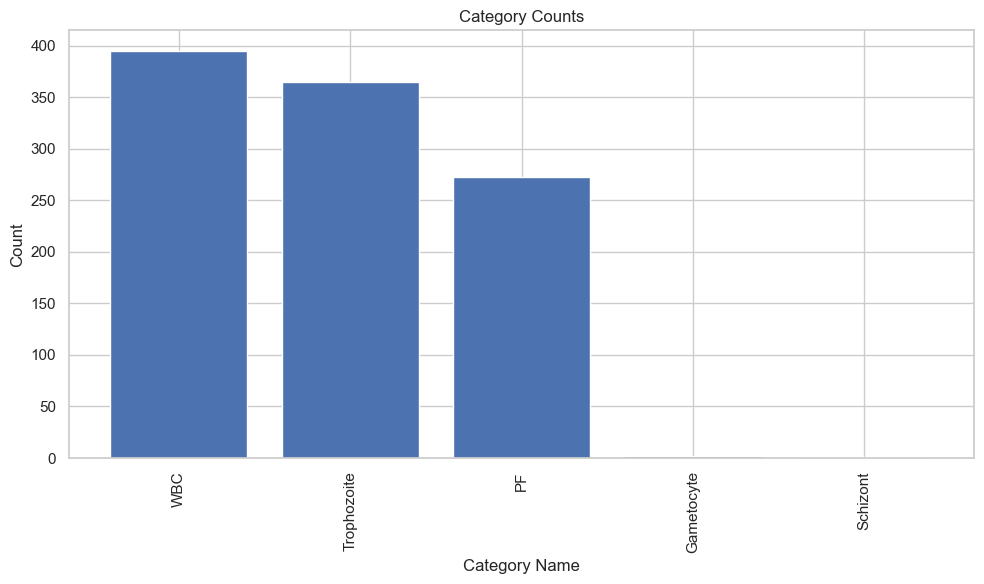

In [212]:
import matplotlib.pyplot as plt

# Get the count of each category
category_counts = slides_2['category_name'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Category Name')
plt.ylabel('Count')
plt.title('Category Counts')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [213]:
import pandas as pd
# Thick and Thin in annotations_df
sample_annotations_df['is_thick'] = sample_annotations_df['file_name'].str.contains('THICK', case=False)
sample_annotations_df['is_thin'] = sample_annotations_df['file_name'].str.contains('THIN', case=False)
annotation_thick = sample_annotations_df['is_thick']
annotation_thin = sample_annotations_df['is_thin']

thick_annotations = sample_annotations_df[annotation_thick]
thick_annotations = thick_annotations.drop('is_thick', axis = 1)
thick_annotations = thick_annotations.drop('is_thin', axis = 1)
thick_annotations = thick_annotations.drop('category_id', axis = 1)
thick_annotations= thick_annotations.drop('category_name', axis = 1)
thick_annotations= thick_annotations.groupby(['file_name','image_id']).size().reset_index(name='count')
length_thick_annotations = len(thick_annotations)
print(length_thick_annotations)

thin_annotations = sample_annotations_df[annotation_thin]
thin_annotations = thin_annotations.drop('is_thick', axis = 1)
thin_annotations = thin_annotations.drop('is_thin', axis = 1)
thin_annotations = thin_annotations.drop('category_id', axis = 1)
thin_annotations = thin_annotations.drop('category_name', axis = 1)
length_thin_annotations = len(thin_annotations)
print(length_thin_annotations)

365
1476


In [214]:
# Thick and Thin in metadata_df
metadata_df['is_thick'] = metadata_df['slide_name'].str.contains('THICK', case=False)
metadata_df['is_thin'] = metadata_df['slide_name'].str.contains('THIN', case=False)
metadata_thick = metadata_df['is_thick']
metadata_thin = metadata_df['is_thin']

thick_meta = metadata_df[metadata_thick]
thick_meta = thick_meta.drop('is_thick', axis = 1)
thick_meta = thick_meta.drop('is_thin', axis = 1)
thick_meta = thick_meta.drop('stain', axis = 1)
thick_meta = thick_meta.drop('username', axis = 1)
thick_meta = thick_meta.groupby(['timestamp','slide_name','zoom_ration']).size().reset_index(name='Number')
thick_meta = thick_meta.drop('Number', axis = 1)
length_thick_meta = len(thick_meta)
print(length_thick_meta)

thin_meta = metadata_df[metadata_thin]
thin_meta = thin_meta.drop('is_thick', axis = 1)
thin_meta = thin_meta.drop('is_thin', axis = 1)
thin_meta = thin_meta.drop('stain', axis = 1)
thin_meta = thin_meta.drop('username', axis = 1)
thin_meta = thin_meta.groupby(['timestamp','slide_name','zoom_ration']).size().reset_index(name='Number')
thin_meta = thin_meta.drop('Number', axis = 1)
length_thin_meta = len(thin_meta)
print(length_thin_meta)

2661
2472


In [215]:
#thick_images_2.to_csv('thick_images_2.csv', index = False)
#thin_images_2.to_csv('thin_images_2.csv', index = False)

#thick_images_3.to_csv('thick_images_3.csv', index = False)
#thin_images_3.to_csv('thin_images_3.csv', index = False)

In [216]:
import numpy as np
trophozoite_annotations = sample_annotations_df[sample_annotations_df['category_id'] == 1]

# Create a mapping of category_id to category_name
category_mapping = sample_annotations_df.groupby('category_id')['category_name'].first()

# Replacing category_id with category_name in the groupby column
trophozoite_annotations.loc[:,'category_id'] = trophozoite_annotations['category_id'].map(category_mapping)

trophozoite_annotations = trophozoite_annotations.groupby(['image_id','category_id']).size().reset_index(name='Number')
trophozoite_annotations.columns = ['Image_ID','Category_name','Number']
trophozoite_annotations.head()

,Image_ID,Category_name,Number
0,1,Trophozoite,118
1,2,Trophozoite,98
2,3,Trophozoite,137
3,4,Trophozoite,79
4,5,Trophozoite,122


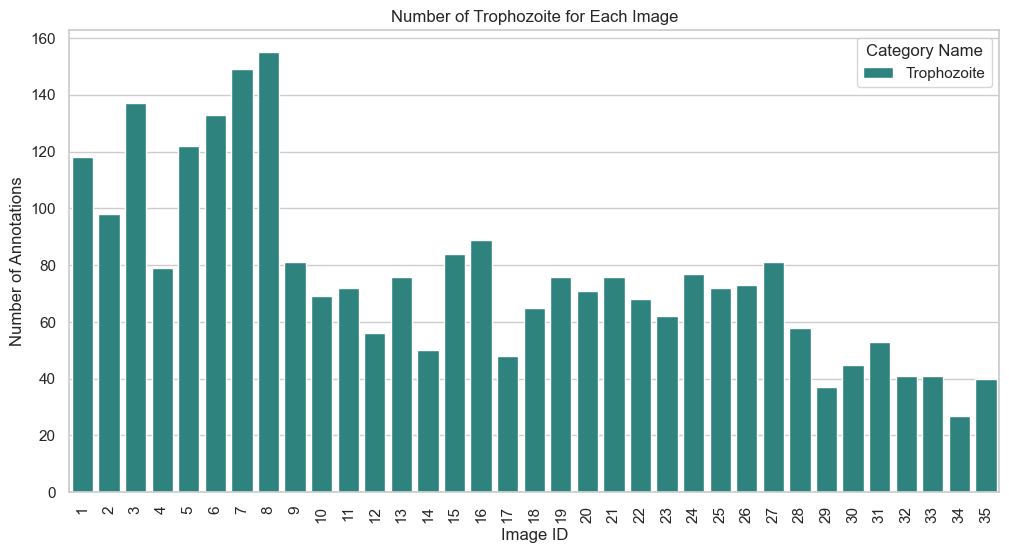

In [217]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# Range of images 
image_range = trophozoite_annotations['Image_ID'].unique()[:35]

# Filter the data to only include the selected image range
filtered_data = trophozoite_annotations[trophozoite_annotations['Image_ID'].isin(image_range)]

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Image_ID', y='Number', hue='Category_name', data=filtered_data, palette='viridis')
plt.title('Number of Trophozoite for Each Image')
plt.xlabel('Image ID')
plt.ylabel('Number of Annotations')
plt.legend(title='Category Name')
plt.xticks(rotation=90)
plt.show()

In [218]:
# For Thick
trophozoite_annotations['is_thick'] = metadata_df['slide_name'].str.contains('THICK', case=False)
trophozoite_thick = trophozoite_annotations['is_thick']

# New column indicating whether the slide is thick or thin
trophozoite_annotations.loc[:, 'Slide_Name'] = np.where(trophozoite_thick, 'Thick','Thin')
trophozoite_annotations_thick = trophozoite_annotations[trophozoite_thick]
trophozoite_annotations_thick = trophozoite_annotations_thick.drop('is_thick', axis = 1)
trophozoite_annotations_thick.head()

,Image_ID,Category_name,Number,Slide_Name
0,1,Trophozoite,118,Thick
1,2,Trophozoite,98,Thick
2,3,Trophozoite,137,Thick
3,4,Trophozoite,79,Thick
4,5,Trophozoite,122,Thick


In [219]:
#trophozoite_annotations_thick.to_csv('trophozoite_annotations_thick.csv', index = False)

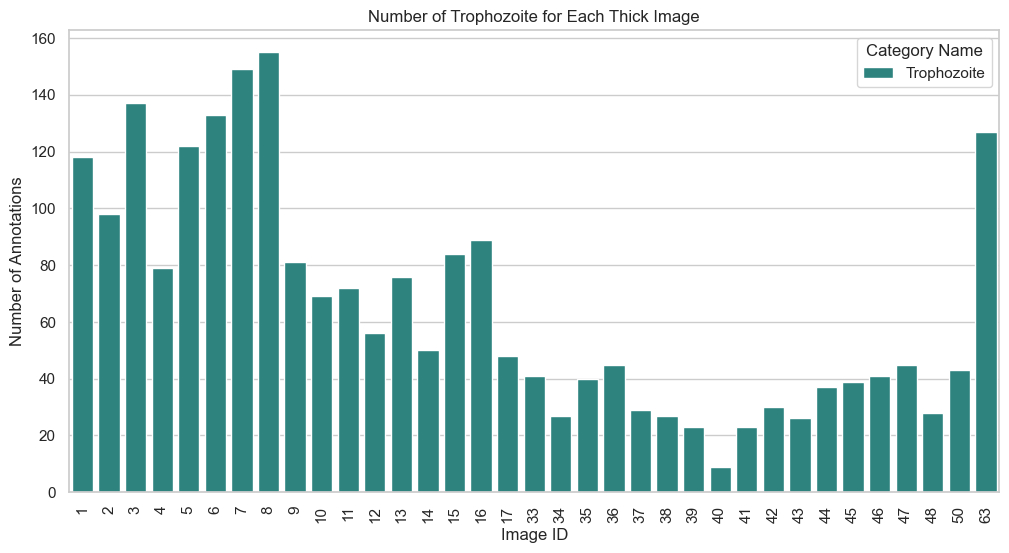

In [220]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# Range of images 
image_range = trophozoite_annotations_thick['Image_ID'].unique()[:35]

# Filter the data to only include the selected image range
filtered_data_thick = trophozoite_annotations_thick[trophozoite_annotations_thick['Image_ID'].isin(image_range)]

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Image_ID', y='Number', hue='Category_name', data=filtered_data_thick, palette='viridis')
plt.title('Number of Trophozoite for Each Thick Image')
plt.xlabel('Image ID')
plt.ylabel('Number of Annotations')
plt.legend(title='Category Name')
plt.xticks(rotation=90)
plt.show()

In [221]:
# For Thin
trophozoite_annotations['is_thin'] = metadata_df['slide_name'].str.contains('THIN', case=False)
trophozoite_thin = trophozoite_annotations['is_thin']
# For Zoomratio
#trophozoite_annotations['zoom_ration'] = metadata_df['zoom_ration']

# New column indicating whether the slide is thick or thin
trophozoite_annotations.loc[:, 'Slide_Name'] = np.where(trophozoite_thin, 'Thin','Thick')
trophozoite_annotations_thin = trophozoite_annotations[trophozoite_thin]
trophozoite_annotations_thin = trophozoite_annotations_thin.drop('is_thin', axis = 1)
trophozoite_annotations_thin = trophozoite_annotations_thin.drop('is_thick', axis = 1)
trophozoite_annotations_thin.head()
#trophozoite_annotations_thin.info()

,Image_ID,Category_name,Number,Slide_Name
17,18,Trophozoite,65,Thin
18,19,Trophozoite,76,Thin
19,20,Trophozoite,71,Thin
20,21,Trophozoite,76,Thin
21,22,Trophozoite,68,Thin


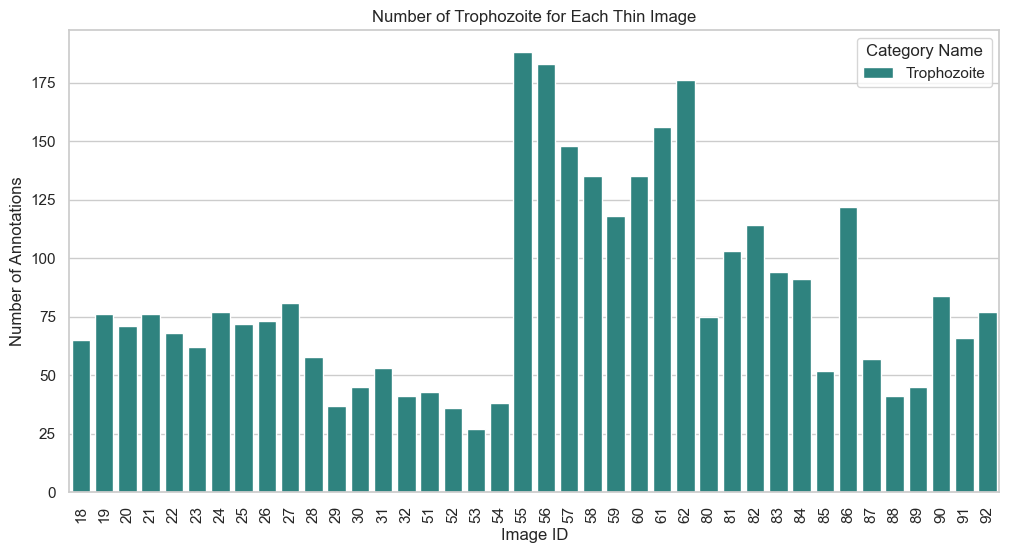

In [222]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# Range of images 
image_range = trophozoite_annotations_thin['Image_ID'].unique()[:40]

# Filter the data to only include the selected image range
filtered_data_thin = trophozoite_annotations_thin[trophozoite_annotations_thin['Image_ID'].isin(image_range)]
#annotation_range = filtered_data_thin['Number'].min(), filtered_data_thin['Number'].max()
#annotation_range = (0,45)

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Image_ID', y='Number', hue='Category_name', data=filtered_data_thin, palette='viridis')
plt.title('Number of Trophozoite for Each Thin Image')
plt.xlabel('Image ID')
plt.ylabel('Number of Annotations')
plt.legend(title='Category Name')
plt.xticks(rotation=90)
plt.show()

In [224]:
schizont_annotations = sample_annotations_df[annotations_df['category_id'] == 2]

schizont_annotations = schizont_annotations.groupby(['image_id']).size().reset_index(name='Number')
schizont_annotations['category_id'] = 2

category_mapping = sample_annotations_df[['category_id', 'category_name']].drop_duplicates()
schizont_annotations.loc[:,'category_id'] = schizont_annotations['category_id'].replace(category_mapping.set_index('category_id')['category_name'])
schizont_annotations.columns = ['Image_ID','Number','Category_name']
schizont_annotations.head()

,Image_ID,Number,Category_name
0,144,1,Schizont


In [273]:
gametocyte_annotations = sample_annotations_df[sample_annotations_df['category_id'] == 3]

gametocyte_annotations = gametocyte_annotations.groupby(['image_id']).size().reset_index(name='Number')
gametocyte_annotations['category_id'] = 3

category_mapping = sample_annotations_df[['category_id', 'category_name']].drop_duplicates()
gametocyte_annotations.loc[:,'category_id'] = gametocyte_annotations['category_id'].replace(category_mapping.set_index('category_id')['category_name'])
gametocyte_annotations.columns = ['Image_ID','Number','Category_name']
gametocyte_annotations

,Image_ID,Number,Category_name
0,30,1,Gametocyte
1,102,1,Gametocyte


In [271]:
wbc_annotations = sample_annotations_df[sample_annotations_df['category_id'] == 4]
wbc_annotations = wbc_annotations.drop('is_thick', axis = 1)
wbc_annotations = wbc_annotations.drop('is_thin', axis = 1)
wbc_annotations = wbc_annotations.groupby(['image_id','category_id']).size().reset_index(name='count')

wbc_annotations.head()

,image_id,category_id,count
0,1,4,37
1,2,4,49
2,3,4,42
3,4,4,35
4,5,4,38


In [272]:
pf_annotations = sample_annotations_df[sample_annotations_df['category_id'] == 5]
pf_annotations = pf_annotations.drop('is_thick', axis = 1)
pf_annotations = pf_annotations.drop('is_thin', axis = 1)
pf_annotations = pf_annotations.groupby(['image_id','category_id']).size().reset_index(name='count')
pf_annotations.head()

,image_id,category_id,count
0,1,5,10
1,2,5,13
2,3,5,10
3,4,5,15
4,5,5,26
